In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
import collections
from datetime import datetime

# df = pd.read_csv("dataset/complaint_data.csv")
# df_col_desc = pd.read_csv("dataset/column_desc.csv")

# # Data cleansing - removing null columns and data points

# dropcols = ["Lat_Lon","X_COORD_CD","Y_COORD_CD","CMPLNT_NUM"] # Redundant columns
# for i in df.columns:
#     if float(df[i].isnull().sum())/len(df)*100 > 20: # if more than 10% data is empty, clip the column
#         dropcols.append(i)
# df = df.drop(dropcols, axis=1)
# df = df[~df.isnull().any(axis=1)]

# # Parsing the DateTime column 

# df["RPT_DT"] = df["RPT_DT"].apply(lambda x: datetime.strptime(x, '%m/%d/%y')
#                                   .strftime('%Y-%m-%d')).astype('datetime64[ns]')
# df["CMPLNT_FR_DT"] = df["CMPLNT_FR_DT"].apply(lambda x: datetime.strptime(x, '%m/%d/%y')
#                                               .strftime('%Y-%m-%d')).astype('datetime64[ns]')
# df["CMPLNT_TO_DT"] = df["CMPLNT_TO_DT"].apply(lambda x: datetime.strptime(x, '%m/%d/%y')
#                                               .strftime('%Y-%m-%d')).astype('datetime64[ns]')

# df["RPT_DT"] = pd.to_datetime(df["RPT_DT"])
# df["CMPLNT_FR_DT"] = pd.to_datetime(df["CMPLNT_FR_DT"])
# df["CMPLNT_TO_DT"] = pd.to_datetime(df["CMPLNT_TO_DT"])

# df["FR_TM_CAT"] = df["CMPLNT_FR_TM"].apply(lambda x: int(x.strip().split(':')[0])//6)
# df["FR_TM_CAT"] = df["CMPLNT_TO_TM"].apply(lambda x: int(x.strip().split(':')[0])//6)

# # Removing outliers

# df = df[~(df['CMPLNT_TO_DT'] >= '2017-01-01')]

In [ ]:
# Compiling list of Offenses, their categories and key codes

offense_code = {}
offlist = df["OFNS_DESC"].unique()
for each in offlist:
    key = df[df["OFNS_DESC"]==each]["KY_CD"].unique()[0]
    offense_code[key] = each

print "Offense Codes and Description " + str(len(offense_code))
print ""
offense_code = collections.OrderedDict(sorted(offense_code.items()))
for k,v in offense_code.items():
    print k,v
    
# Repeating the same for Police Codes and Descriptions

pd_code = {}
pdlist = df["PD_DESC"].unique()
for each in pdlist:
    key = df[df["PD_DESC"]==each]["PD_CD"].unique()[0]
    pd_code[key] = each

print ""
print "Police Department Codes and Descriptions " + str(len(pd_code))
pd_code = collections.OrderedDict(sorted(pd_code.items()))
for k,v in pd_code.items():
    print k,v

# INFERENCES

# Using only KY_CD, PD_CD for analysis

#df = df.drop(['PD_DESC','OFNS_DESC'], axis=1)

In [2]:
# NOTES

# CRM_ATPT_CPTD_CD - Generate Category variable (Successful, Failed, Attempted)
# Types of Crime across Zipcodes - Start with LAW_CAT_CD
# Precinct involved - look for patterns across this
# Categorical variables include - CRM_ATPT_CPTD_CD, KY_CD, PD_CD, LAW_CAT_CD, ADDR_PCT_CD, 
#                                 BORO_NM, PREM_TYP_DESC, ZIPCODE
# Numerical variables - Latitude, Longitude
# TRY - KMODES clustering for mixed data
# Check diff in dates of crime committed and reported
# Drop columns PD_CD, PD_DESC, OFNS_DESC
# Duration of crimes - 'CMPLNT_FR_TM','CMPLNT_TO_TM'

In [ ]:
# MACHINE LEARNING - GENERATING CATEGORY VARIABLES

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['CRM_ATPT_CPTD_CD'])
df['CRM_CAT'] = le.transform(df['CRM_ATPT_CPTD_CD'])

le = preprocessing.LabelEncoder()
le.fit(df['LAW_CAT_CD'])
df['LAW_CAT'] = le.transform(df['LAW_CAT_CD'])

le = preprocessing.LabelEncoder()
le.fit(df['JURIS_DESC'])
df['JURIS_CAT'] = le.transform(df['JURIS_DESC'])

le = preprocessing.LabelEncoder()
le.fit(df['BORO_NM'])
df['BORO_CAT'] = le.transform(df['BORO_NM'])

le = preprocessing.LabelEncoder()
le.fit(df['PREM_TYP_DESC'])
df['PREM_CAT'] = le.transform(df['PREM_TYP_DESC'])

df['DATE_CAT'] = df['CMPLNT_FR_DT'].map(lambda x: x.month)
df = df.reset_index(drop=True)

In [ ]:
# K-Means Clustering Algorithm
from sklearn.neighbors import NearestNeighbors
from kmodes.kprototypes import KPrototypes

# KMeans Algorithm

from sklearn.cluster import KMeans
def clustering(train, usecols, n):
    #kmeans = KMeans(n_clusters=n, random_state=0,).fit(train)
    kproto = KPrototypes(n_clusters=n, init='Cao', verbose=2)
    kproto.fit_predict(train, categorical=usecols)
    return kproto.cluster_centroids_, kproto.labels_

cols = ["FR_TM_CAT","DATE_CAT","KY_CD","CRM_CAT","LAW_CAT","BORO_CAT","ADDR_PCT_CD",
        "PREM_CAT","Latitude","Longitude"]
cat = [0,1,2,3,4,5,6,7] # as first n columns are categorical
num_clusters = 3
centers, labels = clustering(df[cols].as_matrix(),cat,num_clusters)
print centers

In [ ]:
# K-Means Clustering Algorithm
from sklearn.neighbors import NearestNeighbors
from kmodes.kprototypes import KPrototypes

# KMeans Algorithm

from sklearn.cluster import KMeans
def clustering(train, usecols, n):
    #kmeans = KMeans(n_clusters=n, random_state=0,).fit(train)
    kproto = KPrototypes(n_clusters=n, init='Cao', verbose=2)
    kproto.fit_predict(train, categorical=usecols)
    return kproto.cluster_centroids_, kproto.labels_

cols = ["FR_TM_CAT","DATE_CAT","KY_CD","CRM_CAT","LAW_CAT","BORO_CAT","ADDR_PCT_CD",
        "PREM_CAT","Latitude","Longitude"]
cat = [0,1,2,3,4,5,6,7] # as first n columns are categorical
num_clusters = 2
centers2, labels22 = clustering(df[cols].as_matrix(),cat,num_clusters)
print centers2

In [23]:
# K-Means Clustering Algorithm
from sklearn.neighbors import NearestNeighbors
from kmodes.kprototypes import KPrototypes

# KMeans Algorithm

from sklearn.cluster import KMeans
def clustering(train, usecols, n):
    #kmeans = KMeans(n_clusters=n, random_state=0,).fit(train)
    kproto = KPrototypes(n_clusters=n, init='Cao', verbose=2)
    kproto.fit_predict(train, categorical=usecols)
    return kproto.cluster_centroids_, kproto.labels_

cols = ["FR_TM_CAT","DATE_CAT","KY_CD","CRM_CAT","LAW_CAT","BORO_CAT","ADDR_PCT_CD",
        "PREM_CAT","Latitude","Longitude"]
cat = [0,1,2,3,4,5,6,7] # as first n columns are categorical
num_clusters = 4
centers4, labels4 = clustering(df[cols].as_matrix(),cat,num_clusters)
print centers4

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 115090, ncost: 62085656.4878
Run: 1, iteration: 2/100, moves: 28809, ncost: 62085639.2394
Run: 1, iteration: 3/100, moves: 532, ncost: 62085639.2349
Run: 1, iteration: 4/100, moves: 3, ncost: 62085639.2349
Run: 1, iteration: 5/100, moves: 0, ncost: 62085639.2349
[array([[ 40.68276435, -73.95243167],
       [ 40.74250527, -73.95166624],
       [ 40.72073885, -73.87293915],
       [ 40.81208904, -73.90180966]]), array([[   2.,   10.,  341.,    1.,    1.,    1.,   75.,   58.],
       [   3.,    9.,  109.,    1.,    0.,    2.,   14.,   49.],
       [   1.,   11.,  344.,    1.,    1.,    3.,  114.,   49.],
       [   3.,   12.,  351.,    1.,    1.,    0.,   47.,   58.]])]


In [8]:
# K-Means Clustering Algorithm
from sklearn.neighbors import NearestNeighbors
from kmodes.kprototypes import KPrototypes

# KMeans Algorithm

from sklearn.cluster import KMeans
def clustering(train, usecols, n):
    #kmeans = KMeans(n_clusters=n, random_state=0,).fit(train)
    kproto = KPrototypes(n_clusters=n, init='Cao', verbose=2)
    kproto.fit_predict(train, categorical=usecols)
    return kproto.cluster_centroids_, kproto.labels_

cols = ["CRM_CAT","ADDR_PCT_CD"]
cat = [0,2] # as first n columns are categorical
num_clusters = 2
centers5, labels5 = clustering(df[cols].as_matrix(),cat,num_clusters)
print centers5

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 0, ncost: 1.55730820982e+11
[array([[    83.        ],
       [ 10782.39339821]]), array([['COMPLETED', '22'],
       ['COMPLETED', '75']],
      dtype='|S21')]


In [ ]:
df['labels'] = labels
print df['labels'].value_counts()

# 1. Plot number of crimes vs clusters
# 2. Plot lat-long for every clusters and compare
# 3. Plot number of crimes foiled (%) vs clusters
# 4. Plot category of crimes for every clusters
# 5. Plot category of premises for every clusters

In [10]:
df['labels'].value_counts()

KeyError: 'labels'

In [9]:
cluster0 = df[df['labels']==0]
cluster1 = df[df['labels']==1]
cluster2 = df[df['labels']==2]

In [8]:
df = pd.read_csv("dataset/complaint_data.csv")

In [9]:
df = pd.read_csv("dataset/complaint_data.csv")

In [11]:
df.CRM_ATPT_CPTD_CD.value_counts()

COMPLETED    607661
ATTEMPTED     10531
Name: CRM_ATPT_CPTD_CD, dtype: int64

In [ ]:
f = []
m = []
v = []

for i in (df["ADDR_PCT_CD"].unique()):
    tot = len(df[df["ADDR_PCT_CD"]==i])
    val = float(len(df[(df["ADDR_PCT_CD"]==i) & (df["LAW_CAT_CD"]=="FELONY")]))
    f.append(val/tot)

for i in (df["ADDR_PCT_CD"].unique()):
    tot = len(df[df["ADDR_PCT_CD"]==i])
    val = float(len(df[(df["ADDR_PCT_CD"]==i) & (df["LAW_CAT_CD"]=="MISDEMEANOR")]))
    m.append(val/tot)

for i in (df["ADDR_PCT_CD"].unique()):
    tot = len(df[df["ADDR_PCT_CD"]==i])
    val = float(len(df[(df["ADDR_PCT_CD"]==i) & (df["LAW_CAT_CD"]=="VIOLATION")]))
    v.append(val/tot)

f = np.array(f)
m = np.array(m)
v = np.array(v)

np.std(f - f.mean())

In [ ]:

plt.plot(np.arange(len(f)),f - f.mean(), color = "blue")
plt.plot(np.arange(len(m)),m - m.mean(), color = "red")
plt.plot(np.arange(len(v)),v - v.mean(), color = "green")
plt.show()

In [ ]:
np.std(f-f.mean(), ddof=2)

In [ ]:
# NOTE 1: THIS IS THROUGH THE WHOLE DATASET, PLOTTING CRIMES AND 
# CATEGORIES OF CRIME - FELONY/MISDEMEANOR/VIOLATION ACROSS PRECINCT NUMBERS

f = []
for i in (df["ADDR_PCT_CD"].unique()):
    tot = len(df[df["ADDR_PCT_CD"]==i])
    val = float(len(df[(df["ADDR_PCT_CD"]==i) & (df["LAW_CAT_CD"]=="FELONY")]))
    f.append(val/tot)

m = []
for i in (df["ADDR_PCT_CD"].unique()):
    tot = len(df[df["ADDR_PCT_CD"]==i])
    val = float(len(df[(df["ADDR_PCT_CD"]==i) & (df["LAW_CAT_CD"]=="MISDEMEANOR")]))
    m.append(val/tot)

v = []
for i in (df["ADDR_PCT_CD"].unique()):
    tot = len(df[df["ADDR_PCT_CD"]==i])
    val = float(len(df[(df["ADDR_PCT_CD"]==i) & (df["LAW_CAT_CD"]=="VIOLATION")]))
    v.append(val/tot)

f = np.array(f)
m = np.array(m)
v = np.array(v)
print ("Absolute values for each category of crime across Categories - ")
plt.plot(np.arange(len(f)),f, label="Felony")
plt.plot(np.arange(len(m)),m, label="Misdemeanor")
plt.plot(np.arange(len(v)),v, label="Violation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print ("Normalized values - ")
plt.plot(np.arange(len(f)),f-f.mean(), label="Felony")
plt.plot(np.arange(len(m)),m-m.mean(), label="Misdemeanor")
plt.plot(np.arange(len(v)),v-v.mean(), label="Violation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

m1 = f.mean()
m2 = m.mean()
m3 = v.mean()
s1 = f.std()
s2 = m.std()
s3 = v.std()
a1,a2,a3 = [],[],[]
for i in range(len(l1)):
    if l1[i] > m1 + s1*2 or l1[i] < m1 - s1*2:
        a1.append(l1[i])
    if l2[i] > m2 + s2*2 or l2[i] < m2 - s2*2:
        a2.append(l2[i])
    if l3[i] > m3 + s3*2 or l3[i] < m3 - s3*2:
        a3.append(l3[i])

print ("Looking only at best and worst performers - ")
plt.plot(np.arange(len(a1)),a1, label="Felony")
plt.plot(np.arange(len(a2)),a2, label="Misdemeanor")
plt.plot(np.arange(len(a3)),a3, label="Violation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
b

In [ ]:
# NOTE 1: THIS IS THROUGH THE WHOLE DATASET, PLOTTING CRIMES AND 
# CATEGORIES OF CRIME - FELONY/MISDEMEANOR/VIOLATION ACROSS PRECINCT NUMBERS

b = {}
for i in df.BORO_CAT.unique():
    b[i] = df[df["BORO_CAT"] == i]["BORO_NM"].unique()[0]
    
f = []
for i in (df["BORO_CAT"].unique()):
    tot = len(df[df["BORO_CAT"]==i])
    val = float(len(df[(df["BORO_CAT"]==i) & (df["LAW_CAT_CD"]=="FELONY")]))
    f.append(val/tot)

m = []
for i in (df["BORO_CAT"].unique()):
    tot = len(df[df["BORO_CAT"]==i])
    val = float(len(df[(df["BORO_CAT"]==i) & (df["LAW_CAT_CD"]=="MISDEMEANOR")]))
    m.append(val/tot)

v = []
for i in (df["BORO_CAT"].unique()):
    tot = len(df[df["BORO_CAT"]==i])
    val = float(len(df[(df["BORO_CAT"]==i) & (df["LAW_CAT_CD"]=="VIOLATION")]))
    v.append(val/tot)

f = np.array(f)
m = np.array(m)
v = np.array(v)
print ("Absolute values for each category of crime across Categories - ")
plt.plot(np.arange(len(f)),f, label="Felony")
plt.plot(np.arange(len(m)),m, label="Misdemeanor")
plt.plot(np.arange(len(v)),v, label="Violation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print ("Normalized values - ")
plt.plot(np.arange(len(f)),f-f.mean(), label="Felony")
plt.plot(np.arange(len(m)),m-m.mean(), label="Misdemeanor")
plt.plot(np.arange(len(v)),v-v.mean(), label="Violation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

m1 = f.mean()
m2 = m.mean()
m3 = v.mean()
s1 = f.std()
s2 = m.std()
s3 = v.std()
a1,a2,a3 = [],[],[]
for i in range(len(l1)):
    if l1[i] > m1 + s1*2 or l1[i] < m1 - s1*2:
        a1.append(l1[i])
    if l2[i] > m2 + s2*2 or l2[i] < m2 - s2*2:
        a2.append(l2[i])
    if l3[i] > m3 + s3*2 or l3[i] < m3 - s3*2:
        a3.append(l3[i])

print ("Looking only at best and worst performers - ")
plt.plot(np.arange(len(a1)),a1, label="Felony")
plt.plot(np.arange(len(a2)),a2, label="Misdemeanor")
plt.plot(np.arange(len(a3)),a3, label="Violation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [ ]:
df_tmp = df[df['BORO_CAT'] == 3]
df_tmp = df_tmp['LAW_CAT_CD'].value_counts() / df_tmp.shape[0]
df_tmp.plot(kind='barh', stacked=True)
plt.show()

In [4]:
df.columns

Index([u'CMPLNT_FR_DT', u'CMPLNT_FR_TM', u'CMPLNT_TO_DT', u'CMPLNT_TO_TM',
       u'RPT_DT', u'KY_CD', u'OFNS_DESC', u'PD_CD', u'PD_DESC',
       u'CRM_ATPT_CPTD_CD', u'LAW_CAT_CD', u'JURIS_DESC', u'BORO_NM',
       u'ADDR_PCT_CD', u'PREM_TYP_DESC', u'Latitude', u'Longitude', u'ZIPCODE',
       u'FR_TM_CAT', u'CRM_CAT', u'LAW_CAT', u'JURIS_CAT', u'BORO_CAT',
       u'PREM_CAT', u'DATE_CAT'],
      dtype='object')

In [5]:
df_cross = pd.crosstab([df['BORO_NM'], df['LAW_CAT_CD']], df['CRM_ATPT_CPTD_CD'])
df_cross['TOTAL'] = df_cross.sum(axis=1)
df_cross['SUCCESS_RATE'] = df_cross['COMPLETED'] / df_cross['TOTAL']

In [12]:
df_cross = pd.crosstab([df['BORO_NM'], df['LAW_CAT_CD']], df['CRM_ATPT_CPTD_CD'])
total = df_cross.sum(axis=1)
df_cross['SUCCESS_RATE'] = df_cross['COMPLETED'] / total

In [13]:
df_cross

CRM_ATPT_CPTD_CD           ATTEMPTED  COMPLETED  SUCCESS_RATE
BORO_NM       LAW_CAT_CD                                     
BRONX         FELONY            1201      28793      0.959959
              MISDEMEANOR        372      58227      0.993652
              VIOLATION           24      12861      0.998137
BROOKLYN      FELONY            2021      50428      0.961467
              MISDEMEANOR        700      82091      0.991545
              VIOLATION           64      22252      0.997132
MANHATTAN     FELONY            1434      37566      0.963231
              MISDEMEANOR        862      66968      0.987292
              VIOLATION           55      13672      0.995993
QUEENS        FELONY            1402      35431      0.961936
              MISDEMEANOR        401      54758      0.992730
              VIOLATION           28      14683      0.998097
STATEN ISLAND FELONY             174       5467      0.969154
              MISDEMEANOR        120      12859      0.990754
              VIOLATION            9       4407      0.997962

In [4]:
df_cross

CRM_ATPT_CPTD_CD           ATTEMPTED  COMPLETED  TOTAL  SUCCESS_RATE
BORO_NM       LAW_CAT_CD                                            
BRONX         FELONY            1201      28793  29994      0.959959
              MISDEMEANOR        372      58227  58599      0.993652
              VIOLATION           24      12861  12885      0.998137
BROOKLYN      FELONY            2021      50428  52449      0.961467
              MISDEMEANOR        700      82091  82791      0.991545
              VIOLATION           64      22252  22316      0.997132
MANHATTAN     FELONY            1434      37566  39000      0.963231
              MISDEMEANOR        862      66968  67830      0.987292
              VIOLATION           55      13672  13727      0.995993
QUEENS        FELONY            1402      35431  36833      0.961936
              MISDEMEANOR        401      54758  55159      0.992730
              VIOLATION           28      14683  14711      0.998097
STATEN ISLAND FELONY             174       5467   5641      0.969154
              MISDEMEANOR        120      12859  12979      0.990754
              VIOLATION            9       4407   4416      0.997962

In [ ]:
df_cross['SUCCESS_RATE'].plot(kind='bar')
plt.show()

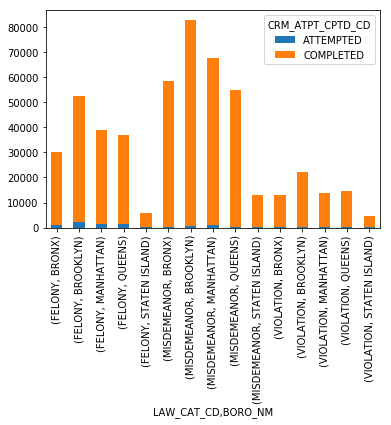

In [4]:
# multiple x-axis group by
pd.crosstab([df['LAW_CAT_CD'], df['BORO_NM']], df['CRM_ATPT_CPTD_CD']).plot(kind='bar', stacked=True)
plt.show()

In [6]:
df.groupby(['BORO_NM', 'LAW_CAT_CD'])['CRM_ATPT_CPTD_CD'].agg('count')

BORO_NM        LAW_CAT_CD 
BRONX          FELONY         29994
               MISDEMEANOR    58599
               VIOLATION      12885
BROOKLYN       FELONY         52449
               MISDEMEANOR    82791
               VIOLATION      22316
MANHATTAN      FELONY         39000
               MISDEMEANOR    67830
               VIOLATION      13727
QUEENS         FELONY         36833
               MISDEMEANOR    55159
               VIOLATION      14711
STATEN ISLAND  FELONY          5641
               MISDEMEANOR    12979
               VIOLATION       4416
Name: CRM_ATPT_CPTD_CD, dtype: int64

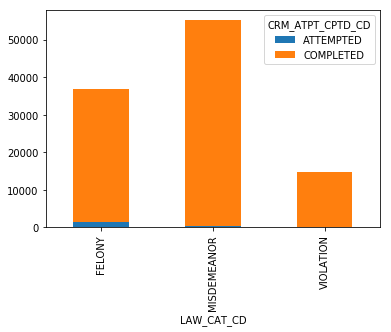

In [139]:
# multiple x-axis group by
tmp_df = df[df['BORO_NM']=='QUEENS']
pd.crosstab([tmp_df['LAW_CAT_CD']], tmp_df['CRM_ATPT_CPTD_CD']).plot(kind='bar', stacked=True)
plt.show()

In [ ]:
df.groupby('LAW_CAT_CD')['CRM_ATPT_CPTD_CD']

In [ ]:
f = df[(df['LAW_CAT_CD']=='FELONY')]['BORO_CAT'].value_counts() / df.shape[0]
print f
f = f.to_frame()
f.columns = ['CRIME_RATE']

f['BORO'] = f.index
f['BORO'] = f['BORO'].map(b)

f = f[['BORO','CRIME_RATE']]

In [ ]:
f

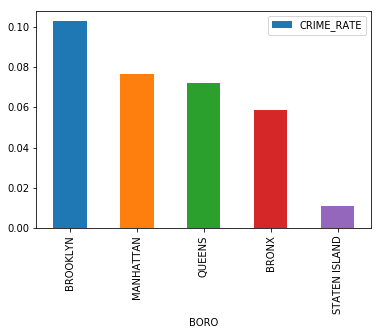

In [118]:
f.plot(kind='bar',x='BORO',y='CRIME_RATE')
plt.show()

In [105]:
b[0]

'BRONX'